https://qiita.com/yampy/items/706d44417c433e68db0d



In [37]:
import matplotlib.pyplot as plt

In [28]:
import keras

from keras.layers import Input, Dense, Dropout
from keras.models import Model

In [5]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [17]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [10]:
X_train = X_train.reshape(60000, 784).astype('float32')/255
X_train.shape, X_train[:5]

((60000, 784), array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [23]:
X_test = X_test.reshape(10000, 784).astype('float32')/255

y_train = keras.utils.np_utils.to_categorical(y_train.astype('int32'), 10)
y_test = keras.utils.np_utils.to_categorical(y_test.astype('int32'), 10)


In [24]:
y_train.shape

(60000, 10)

# 手書き文字の認識(1): 全結合層のみ

In [33]:
inputs = Input(shape=(784,))

nw = Dense(512, activation='relu')(inputs)
nw = Dropout(.5)(nw)
nw = Dense(512, activation='relu')(nw)
nw = Dropout(.5)(nw)
predictions = Dense(10, activation='softmax')(nw)

model = Model(inputs=inputs, outputs=predictions)

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [34]:
history = model.fit(X_train, y_train, batch_size=128,
                   epochs=20, verbose=1,
                   validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 35s 587us/step - loss: 2.3018 - acc: 0.1109 - val_loss: 2.2948 - val_acc: 0.1135
Epoch 2/20
60000/60000 [==============================] - 42s 697us/step - loss: 2.3016 - acc: 0.1122 - val_loss: 2.2954 - val_acc: 0.1135
Epoch 3/20
60000/60000 [==============================] - 36s 600us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.2955 - val_acc: 0.1135
Epoch 4/20
60000/60000 [==============================] - 35s 581us/step - loss: 2.3015 - acc: 0.1124 - val_loss: 2.2934 - val_acc: 0.1135
Epoch 5/20
60000/60000 [==============================] - 35s 584us/step - loss: 2.3014 - acc: 0.1124 - val_loss: 2.2906 - val_acc: 0.1135
Epoch 6/20
60000/60000 [==============================] - 35s 588us/step - loss: 2.3013 - acc: 0.1124 - val_loss: 2.2873 - val_acc: 0.1135
Epoch 7/20
60000/60000 [==============================] - 36s 602us/step - loss: 2.3012 - acc: 0.1124 - val_loss: 2.

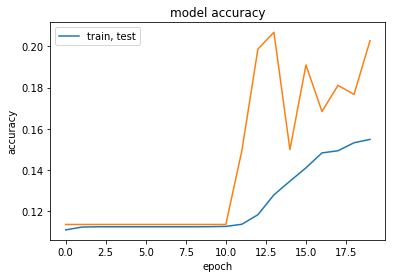

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train, test'], loc='upper left')
plt.show()

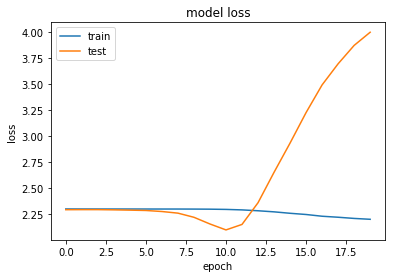

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 手書き文字の認識(2): CNNモデル

In [61]:
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [42]:
from keras import backend

backend.image_data_format()

'channels_last'

In [46]:
backend.backend()

'tensorflow'

In [73]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if backend.image_data_format() == 'channels_first':
    inputs = Input(shape=(1, 28, 28))
    X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')/255
    X_test = X_test.reshape(X_train.shape[0], 1, 28, 28).astype('float32')/255
else:
    inputs = Input(shape=(28, 28, 1))
    X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
    X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255


In [74]:
y_train = keras.utils.np_utils.to_categorical(y_train, 10)
y_test =  keras.utils.np_utils.to_categorical(y_test, 10)


In [75]:
X_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10))

In [76]:
X_test.shape, y_test.shape

((10000, 28, 28, 1), (10000, 10))

In [81]:
conv1_1 = Conv2D(32, (3,3), activation='relu', 
                 name='conv1_1')(inputs)
conv1_2 = Conv2D(64, (3,3), activation='relu', 
                 name='conv1_2')(conv1_1)
pool1 = MaxPooling2D(pool_size=(2,2), name='pool1')(conv1_2)

nw = Dropout(.25)(pool1)
nw = Flatten()(nw)
nw = Dense(128, activation='relu')(nw)
nw= Dropout(.5)(nw)

predictions = Dense(10, activation='softmax')(nw)

model = Model(inputs=inputs, outputs=predictions)
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adadelta(),
             metrics=['accuracy'])



In [82]:
cb_cp = keras.callbacks.ModelCheckpoint('./out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5',
                                        verbose=1, 
                                        save_weights_only=True)
cb_tf = keras.callbacks.TensorBoard(log_dir='./out/tensorBoard',
                                    histogram_freq=0)


In [84]:
history = model.fit(X_train, y_train, batch_size=128,
                    epochs=10, verbose=1, 
                    callbacks=[cb_cp, cb_tf],
                    validation_data=(X_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 467s 8ms/step - loss: 0.0901 - acc: 0.9731 - val_loss: 0.0448 - val_acc: 0.9856

Epoch 00001: saving model to ./out/checkpoints/weights.01-0.04.hdf5
Epoch 2/10
60000/60000 [==============================] - 448s 7ms/step - loss: 0.0656 - acc: 0.9804 - val_loss: 0.0323 - val_acc: 0.9888

Epoch 00002: saving model to ./out/checkpoints/weights.02-0.03.hdf5
Epoch 3/10
60000/60000 [==============================] - 442s 7ms/step - loss: 0.0547 - acc: 0.9836 - val_loss: 0.0313 - val_acc: 0.9901

Epoch 00003: saving model to ./out/checkpoints/weights.03-0.03.hdf5
Epoch 4/10
60000/60000 [==============================] - 440s 7ms/step - loss: 0.0486 - acc: 0.9856 - val_loss: 0.0281 - val_acc: 0.9897

Epoch 00004: saving model to ./out/checkpoints/weights.04-0.03.hdf5
Epoch 5/10
60000/60000 [==============================] - 444s 7ms/step - loss: 0.0417 - acc: 0.9868 - val_loss: 0.0298 - 

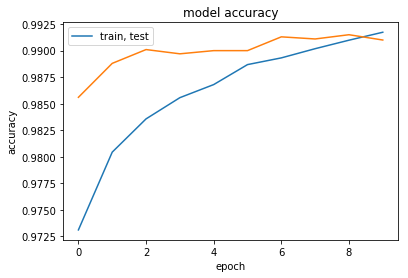

In [85]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train, test'], loc='upper left')
plt.show()

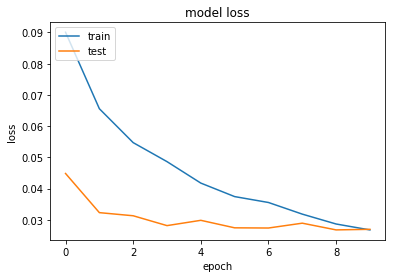

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()